<a href="https://colab.research.google.com/github/lucasmeirellesmachado/CDIA-Estatistica_II/blob/main/Atividade_Avaliativa_Semana_de_Imersao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 2ª Semana de Imersão

### Discentes:
Aracy Siqueira de Oliveira Nunes Braga; Cristiane Alves dos Santos;Lucas Meirelles Machado



### Objetivo:
O objetivo desta atividade é descrever os dados de internação hospitalar no SUS para a realização de partos obstétricos, referente às informações do município de Manaus, durante o mês de abril de 2024.

### Passos iniciais

In [221]:
# Importar as bibliotecas que serão utilizadas durante a atividade

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

In [261]:
# Importar a base de dados

SIH_completo = pd.read_csv('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Cópia de RD202404.csv',
                           sep=';',
                           low_memory=False)

In [262]:
# Importar planilha das convenções SIH

conv_espec = pd.read_excel('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Convenções SIH RD.xlsx', sheet_name="ESPEC")
conv_ident = pd.read_excel('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Convenções SIH RD.xlsx', sheet_name="IDENT")
conv_sexo = pd.read_excel('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Convenções SIH RD.xlsx', sheet_name="SEXO")
conv_cobranca = pd.read_excel('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Convenções SIH RD.xlsx', sheet_name="COBRANCA")
conv_gestao = pd.read_excel('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Convenções SIH RD.xlsx', sheet_name="GESTAO")
conv_vdrl = pd.read_excel('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Convenções SIH RD.xlsx', sheet_name="IND_VDRL")
conv_cod_idade = pd.read_excel('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Convenções SIH RD.xlsx', sheet_name="COD_IDADE")
conv_morte = pd.read_excel('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Convenções SIH RD.xlsx', sheet_name="MORTE")
conv_car_int = pd.read_excel('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Convenções SIH RD.xlsx', sheet_name="CAR_INT")
conv_gestao = pd.read_excel('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Convenções SIH RD.xlsx', sheet_name="GESTAO")
conv_instrucao = pd.read_excel('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Convenções SIH RD.xlsx', sheet_name="INSTRU")
conv_gest_risco = pd.read_excel('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Convenções SIH RD.xlsx', sheet_name="GESTRISCO")
conv_vinc_prev = pd.read_excel('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Convenções SIH RD.xlsx', sheet_name="VINCPREV")
conv_infe_hosp = pd.read_excel('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Convenções SIH RD.xlsx', sheet_name="INFEHOSP")
conv_raca_cor = pd.read_excel('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Convenções SIH RD.xlsx', sheet_name="RACA_COR")

In [263]:
SIH_completo

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
0,120000,2024,4,3,4.034526e+12,1224100201423,1,69970000,120060,19970918,...,NaN,0,0,0,0,0,0,0,0,0
1,120000,2024,4,2,4.034526e+12,1224100162714,1,69985000,120042,20031024,...,NaN,0,0,0,0,0,0,0,0,0
2,120000,2024,4,2,4.034526e+12,1224100162901,1,69990000,120033,20070111,...,NaN,0,0,0,0,0,0,0,0,0
3,120000,2024,4,3,4.034526e+12,1224100100652,1,69990000,120033,19730304,...,NaN,0,0,0,0,0,0,0,0,0
4,120000,2024,4,3,4.034526e+12,1224100100685,1,69990000,120033,19461009,...,NaN,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220163,172120,2024,4,3,NaN,1724100353085,1,77900000,172120,19920101,...,NaN,0,0,0,0,0,0,0,0,0
1220164,172120,2024,4,3,NaN,1724100353096,1,77900000,172120,20210417,...,NaN,0,0,0,0,0,0,0,0,0
1220165,172120,2024,4,3,NaN,1724100353107,1,77900000,172120,20210714,...,NaN,0,0,0,0,0,0,0,0,0
1220166,172120,2024,4,3,NaN,1724100353118,1,77900000,172120,19980922,...,NaN,0,0,0,0,0,0,0,0,0


In [264]:
pd.options.display.max_info_columns = 113
SIH_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220168 entries, 0 to 1220167
Data columns (total 113 columns):
 #    Column      Non-Null Count    Dtype  
---   ------      --------------    -----  
 0    UF_ZI       1220168 non-null  int64  
 1    ANO_CMPT    1220168 non-null  int64  
 2    MES_CMPT    1220168 non-null  int64  
 3    ESPEC       1220168 non-null  int64  
 4    CGC_HOSP    906782 non-null   float64
 5    N_AIH       1220168 non-null  int64  
 6    IDENT       1220168 non-null  int64  
 7    CEP         1220168 non-null  int64  
 8    MUNIC_RES   1220168 non-null  int64  
 9    NASC        1220168 non-null  int64  
 10   SEXO        1220168 non-null  int64  
 11   UTI_MES_IN  1220168 non-null  int64  
 12   UTI_MES_AN  1220168 non-null  int64  
 13   UTI_MES_AL  1220168 non-null  int64  
 14   UTI_MES_TO  1220168 non-null  int64  
 15   MARCA_UTI   1220168 non-null  int64  
 16   UTI_INT_IN  1220168 non-null  int64  
 17   UTI_INT_AN  1220168 non-null  int64  
 18   

### Organizando o banco de dados para posterior análise

In [265]:
# Filtrar base para obter os dados do município de Manaus

SIH_MANAUS = SIH_completo[SIH_completo['MUNIC_RES'] == 130260]

In [266]:
SIH_MANAUS

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
804,120000,2024,4,3,4.034526e+12,1224100084603,1,69020141,130260,19370420,...,NaN,0,0,0,0,0,0,0,0,0
4048,120000,2024,4,3,4.034526e+12,1224100152088,1,69028120,130260,20000210,...,NaN,0,0,0,0,0,0,0,0,0
20157,130000,2024,4,3,6.972950e+11,1324100333622,1,69021005,130260,19761228,...,NaN,0,0,0,0,0,0,0,0,0
20158,130000,2024,4,3,6.972950e+11,1324100333666,1,69057000,130260,19880225,...,NaN,0,0,0,0,0,0,0,0,0
20159,130000,2024,4,3,6.972950e+11,1324100342488,1,69020210,130260,19480702,...,NaN,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174041,350000,2024,4,1,4.915035e+13,3524102146862,1,69099318,130260,20220205,...,NaN,1,0,0,0,0,0,0,0,0
1188631,350000,2024,4,9,4.915035e+13,3524102146543,1,69068040,130260,20190121,...,NaN,0,0,0,0,0,0,0,0,0
1190896,350000,2024,4,1,4.915035e+13,3524102148424,1,69047460,130260,19980207,...,NaN,0,0,0,0,0,0,0,0,0
1201934,350000,2024,4,7,6.097574e+13,3524107477616,1,69087230,130260,20110613,...,NaN,0,0,0,0,0,0,0,0,0


In [267]:
SIH_MANAUS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9897 entries, 804 to 1210968
Data columns (total 113 columns):
 #    Column      Non-Null Count  Dtype  
---   ------      --------------  -----  
 0    UF_ZI       9897 non-null   int64  
 1    ANO_CMPT    9897 non-null   int64  
 2    MES_CMPT    9897 non-null   int64  
 3    ESPEC       9897 non-null   int64  
 4    CGC_HOSP    9404 non-null   float64
 5    N_AIH       9897 non-null   int64  
 6    IDENT       9897 non-null   int64  
 7    CEP         9897 non-null   int64  
 8    MUNIC_RES   9897 non-null   int64  
 9    NASC        9897 non-null   int64  
 10   SEXO        9897 non-null   int64  
 11   UTI_MES_IN  9897 non-null   int64  
 12   UTI_MES_AN  9897 non-null   int64  
 13   UTI_MES_AL  9897 non-null   int64  
 14   UTI_MES_TO  9897 non-null   int64  
 15   MARCA_UTI   9897 non-null   int64  
 16   UTI_INT_IN  9897 non-null   int64  
 17   UTI_INT_AN  9897 non-null   int64  
 18   UTI_INT_AL  9897 non-null   int64  
 19   UTI_

In [269]:
# Excluir colunas que não serão utilizadas, a fim de tornar a base menos pesada

SIH_MANAUS = SIH_MANAUS.drop(columns=['UF_ZI',
                                   'ANO_CMPT',
                                   'MES_CMPT',
                                   'CGC_HOSP',
                                   'N_AIH',
                                   'CEP',
                                   'NASC',
                                   'UTI_MES_IN',
                                   'UTI_MES_AN',
                                   'UTI_MES_AL',
                                   'UTI_MES_TO',
                                   'MARCA_UTI',
                                   'UTI_INT_IN',
                                   'UTI_INT_AN',
                                   'UTI_INT_AL',
                                   'UTI_INT_TO',
                                   'VAL_SADT',
                                   'VAL_RN',
                                   'VAL_ACOMP',
                                   'VAL_ORTP',
                                   'VAL_SANGUE',
                                   'VAL_SADTSR',
                                   'VAL_TRANSP',
                                   'VAL_OBSANG',
                                   'VAL_PED1AC',
                                   'VAL_UTI',
                                   'NAT_JUR',
                                   'RUBRICA',
                                   'HOMONIMO',
                                   'MUNIC_MOV',
                                   'NUM_PROC',
                                   'TOT_PT_SP',
                                   'SEQ_AIH5',
                                   'CNAER',
                                   'GESTOR_COD',
                                   'GESTOR_TP',
                                   'GESTOR_CPF',
                                   'GESTOR_DT',
                                   'CNPJ_MANT',
                                   'COMPLEX',
                                   'FINANC',
                                   'FAEC_TP',
                                   'REGCT',
                                   'AUD_JUST',
                                   'SIS_JUST',
                                   'VAL_SH_FED',
                                   'VAL_SP_FED',
                                   'VAL_SH_GES',
                                   'VAL_SP_GES',
                                   'VAL_UCI',
                                   'MARCA_UCI',
                                   'CPF_AUT',
                                   'SEQUENCIA',
                                   'REMESSA'])

In [270]:
SIH_MANAUS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9897 entries, 804 to 1210968
Data columns (total 59 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ESPEC       9897 non-null   int64  
 1   IDENT       9897 non-null   int64  
 2   MUNIC_RES   9897 non-null   int64  
 3   SEXO        9897 non-null   int64  
 4   DIAR_ACOM   9897 non-null   int64  
 5   QT_DIARIAS  9897 non-null   int64  
 6   PROC_SOLIC  9897 non-null   int64  
 7   PROC_REA    9897 non-null   int64  
 8   VAL_SH      9897 non-null   float64
 9   VAL_SP      9897 non-null   float64
 10  VAL_TOT     9897 non-null   float64
 11  US_TOT      9897 non-null   float64
 12  DT_INTER    9897 non-null   int64  
 13  DT_SAIDA    9897 non-null   int64  
 14  DIAG_PRINC  9897 non-null   object 
 15  DIAG_SECUN  9897 non-null   int64  
 16  COBRANCA    9897 non-null   int64  
 17  NATUREZA    9897 non-null   int64  
 18  GESTAO      9897 non-null   int64  
 19  IND_VDRL    9897 non-null  

In [271]:
# Verificamos que as colunas de diagnóstico secundário 4 a 9 estão vazias.
# Assim, iremos inferir que os mesmos significam que o usuário não possui esses diagnósticos e, assim, iremos excluir essas colunas também.

SIH_diag = SIH_MANAUS.drop(columns=['DIAGSEC4',
                                    'DIAGSEC5',
                                    'DIAGSEC6',
                                    'DIAGSEC7',
                                    'DIAGSEC8',
                                    'DIAGSEC9'])

In [272]:
# Considerando que as colunas de tipo de diagnóstico possui como convenção valores numéricos, iremos verificar se estes valores são iguais a zero (NA).
# Caso assim o forem, também iremos excluí-las.

SIH_diag.describe()

,ESPEC,IDENT,MUNIC_RES,SEXO,DIAR_ACOM,QT_DIARIAS,PROC_SOLIC,PROC_REA,VAL_SH,VAL_SP,...,ETNIA,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
count,9897.00000,9897.0,9897.0,9897.000000,9897.000000,9897.000000,9.897000e+03,9.897000e+03,9897.000000,9897.000000,...,9897.000000,9897.000000,9897.000000,9897.000000,9897.0,9897.0,9897.0,9897.0,9897.0,9897.0
mean,2.86309,1.0,130260.0,2.146812,5.189552,5.866525,3.487579e+08,3.488210e+08,1436.246235,330.388103,...,0.397696,0.232091,0.000606,0.000101,0.0,0.0,0.0,0.0,0.0,0.0
std,2.13853,0.0,0.0,0.989214,6.569574,6.915931,5.316009e+07,5.322057e+07,3899.368098,802.999578,...,8.529152,0.576231,0.028426,0.010052,0.0,0.0,0.0,0.0,0.0,0.0
min,1.00000,1.0,130260.0,1.000000,0.000000,0.000000,2.010103e+08,2.010103e+08,20.400000,3.050000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.00000,1.0,130260.0,1.000000,1.000000,2.000000,3.030903e+08,3.030901e+08,358.250000,66.350000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,2.00000,1.0,130260.0,3.000000,3.000000,3.000000,3.100100e+08,3.100100e+08,567.420000,149.320000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,3.00000,1.0,130260.0,3.000000,6.000000,7.000000,4.080505e+08,4.080505e+08,1040.470000,323.870000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,12.00000,1.0,130260.0,3.000000,94.000000,108.000000,5.060201e+08,5.060201e+08,112163.350000,19441.810000,...,255.000000,2.000000,2.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [273]:
# Constatamos que há valores diferentes de zero nas colunas de tipo de diagnóstico secundário 1, 2 e 3.
# Portanto, iremos excluir as colunas de tipo de diagnóstico secundário de número 4 a 9.

SIH_FINAL = SIH_diag.drop(columns=['TPDISEC4',
                                   'TPDISEC5',
                                   'TPDISEC6',
                                   'TPDISEC7',
                                   'TPDISEC8',
                                   'TPDISEC9'])

In [274]:
SIH_FINAL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9897 entries, 804 to 1210968
Data columns (total 47 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ESPEC       9897 non-null   int64  
 1   IDENT       9897 non-null   int64  
 2   MUNIC_RES   9897 non-null   int64  
 3   SEXO        9897 non-null   int64  
 4   DIAR_ACOM   9897 non-null   int64  
 5   QT_DIARIAS  9897 non-null   int64  
 6   PROC_SOLIC  9897 non-null   int64  
 7   PROC_REA    9897 non-null   int64  
 8   VAL_SH      9897 non-null   float64
 9   VAL_SP      9897 non-null   float64
 10  VAL_TOT     9897 non-null   float64
 11  US_TOT      9897 non-null   float64
 12  DT_INTER    9897 non-null   int64  
 13  DT_SAIDA    9897 non-null   int64  
 14  DIAG_PRINC  9897 non-null   object 
 15  DIAG_SECUN  9897 non-null   int64  
 16  COBRANCA    9897 non-null   int64  
 17  NATUREZA    9897 non-null   int64  
 18  GESTAO      9897 non-null   int64  
 19  IND_VDRL    9897 non-null  

In [275]:
# Por fim, iremos susbtituir os valores nulos nas colunas de diagnóstico secundário por células vazias

SIH_FINAL = SIH_FINAL.fillna ({'DIAGSEC1': '',
                               'DIAGSEC2': '',
                               'DIAGSEC3': ''})



In [276]:
SIH_FINAL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9897 entries, 804 to 1210968
Data columns (total 47 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ESPEC       9897 non-null   int64  
 1   IDENT       9897 non-null   int64  
 2   MUNIC_RES   9897 non-null   int64  
 3   SEXO        9897 non-null   int64  
 4   DIAR_ACOM   9897 non-null   int64  
 5   QT_DIARIAS  9897 non-null   int64  
 6   PROC_SOLIC  9897 non-null   int64  
 7   PROC_REA    9897 non-null   int64  
 8   VAL_SH      9897 non-null   float64
 9   VAL_SP      9897 non-null   float64
 10  VAL_TOT     9897 non-null   float64
 11  US_TOT      9897 non-null   float64
 12  DT_INTER    9897 non-null   int64  
 13  DT_SAIDA    9897 non-null   int64  
 14  DIAG_PRINC  9897 non-null   object 
 15  DIAG_SECUN  9897 non-null   int64  
 16  COBRANCA    9897 non-null   int64  
 17  NATUREZA    9897 non-null   int64  
 18  GESTAO      9897 non-null   int64  
 19  IND_VDRL    9897 non-null  

### Análise exploratória dos dados

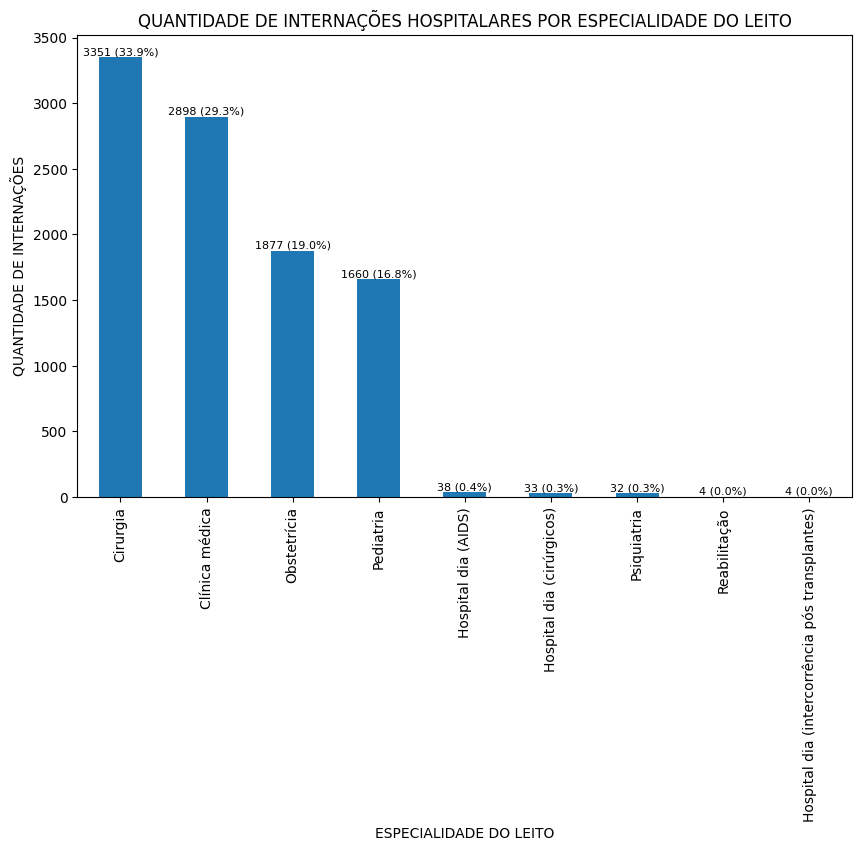

In [277]:
# Ver a contagem e proporção de internações hospitalares por especialidade do leito

# Concatenar os códigos da especialidade de internação com o nome das especialidades dadas pela planilha de Convenções SIH
SIH_concat_espec = pd.merge(SIH_FINAL, conv_espec, on='ESPEC')

# Calcular os valores de contagem
value_counts = SIH_concat_espec['Valor'].value_counts()

# Calcular o total de elementos para calcular a porcentagem
total = value_counts.sum()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = value_counts.plot(kind='bar')

# Adicionar os valores e as porcentagens nas barras
for i, v in enumerate(value_counts):
    percentage = (v / total) * 100
    ax.text(i, v + 0.1, f'{v} ({percentage:.1f}%)', ha='center', va='bottom', fontsize=8)

# Adicionar título e rótulos aos eixos
plt.title('QUANTIDADE DE INTERNAÇÕES HOSPITALARES POR ESPECIALIDADE DO LEITO')
plt.xlabel('ESPECIALIDADE DO LEITO')
plt.ylabel('QUANTIDADE DE INTERNAÇÕES')

# Alterar o ângulo dos rótulos do eixo X
plt.xticks(rotation=90)

plt.show()

In [278]:
SIH_concat_espec['Valor'].value_counts(normalize=True)*100

,proportion
Valor,
Cirurgia,33.858745
Clínica médica,29.281600
Obstetrícia,18.965343
Pediatria,16.772759
Hospital dia (AIDS),0.383955
Hospital dia (cirúrgicos),0.333434
Psiquiatria,0.323330
Reabilitação,0.040416
Hospital dia (intercorrência pós transplantes),0.040416


Temos 33,9% de leitos cirúrgicos, 29,3% de leitos de clínica médica, 19% de leitos obstétricos, 16,8% de leitos pediátricos, 0,4% de leitos hospital-dia (AIDS), 0,3% de leitos de hospital-dia (cirúrgicos), 0,3% de leitos psiquiátricos e 0,04% de leitos de reabilitação e 0,04% de leitos de hospital-dia (intercorrência pós-transplantes). Assim, os leitos cirúrgicos, de clínica médica, obstétricos e pediátricos representam aproximadamente 98,91% do total de leitos utilizados no mês estudado.

In [279]:
SIH_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9897 entries, 0 to 9896
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ESPEC       9897 non-null   int64  
 1   IDENT       9897 non-null   int64  
 2   MUNIC_RES   9897 non-null   int64  
 3   SEXO        9897 non-null   int64  
 4   DIAR_ACOM   9897 non-null   int64  
 5   QT_DIARIAS  9897 non-null   int64  
 6   PROC_SOLIC  9897 non-null   int64  
 7   PROC_REA    9897 non-null   int64  
 8   VAL_SH      9897 non-null   float64
 9   VAL_SP      9897 non-null   float64
 10  VAL_TOT     9897 non-null   float64
 11  US_TOT      9897 non-null   float64
 12  DT_INTER    9897 non-null   int64  
 13  DT_SAIDA    9897 non-null   int64  
 14  DIAG_PRINC  9897 non-null   object 
 15  DIAG_SECUN  9897 non-null   int64  
 16  COBRANCA    9897 non-null   int64  
 17  NATUREZA    9897 non-null   int64  
 18  GESTAO      9897 non-null   int64  
 19  IND_VDRL    9897 non-null  

Temos 33,86% de leitos cirúrgicos, 29,28% de leitos de clínica médica, 19% de leitos obstétricos, 16,77% de leitos pediátricos, 0,38% de leitos hospital-dia (AIDS), 0,33% de leitos de hospital-dia (cirúrgicos), 0,32% de leitos psiquiátricos e 0,04% de leitos de reabilitação e 0,04% de leitos de hospital-dia (intercorrência pós-transplantes). Assim, os leitos cirúrgicos, de clínica médica, obstétricos e pediátricos representam aproximadamente 98,91% do total de leitos utilizados no mês estudado.
```


In [280]:
# Verificando a proporção de identificação de AIH

# Concatenar os códigos da identificação da internação com o nome das identificações dadas pela planilha de Convenções SIH
SIH_concat_ident = pd.merge(SIH_FINAL, conv_ident, on='IDENT')

SIH_concat_ident['Valor'].value_counts(normalize=True)*100

,proportion
Valor,
Principal,100.0


No período estudado, 100% das AIH são do tipo 1 - Principal, ou seja, indica que todas as internações foram internações iniciais.

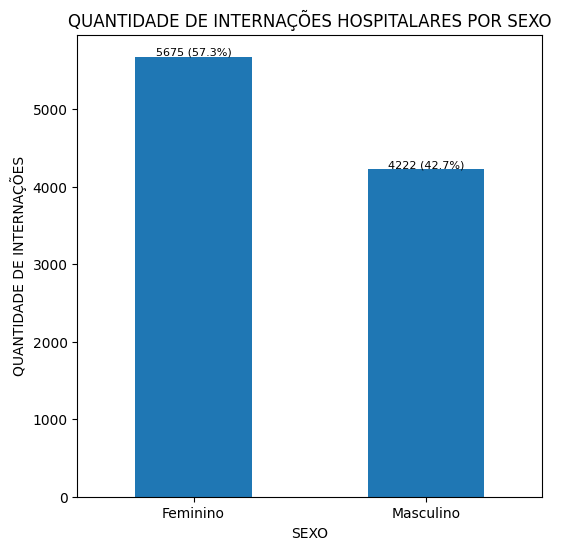

In [281]:
# Ver a contagem e proporção de internações hospitalares por sexo

# Concatenar os códigos da identificação da internação com o nome dados pela planilha de Convenções SIH
SIH_concat_sex = pd.merge(SIH_FINAL, conv_sexo, on='SEXO')

# Calcular os valores de contagem
value_sex = SIH_concat_sex['Valor'].value_counts()

# Calcular o total de elementos para calcular a porcentagem
total = value_counts.sum()

# Criar o gráfico de barras
plt.figure(figsize=(6, 6))
ax1 = value_sex.plot(kind='bar')

# Adicionar os valores e as porcentagens nas barras
for i, v in enumerate(value_sex):
    percentage = (v / total) * 100
    ax1.text(i, v + 0.1, f'{v} ({percentage:.1f}%)', ha='center', va='bottom', fontsize=8)

# Adicionar título e rótulos aos eixos
plt.title('QUANTIDADE DE INTERNAÇÕES HOSPITALARES POR SEXO')
plt.xlabel('SEXO')
plt.ylabel('QUANTIDADE DE INTERNAÇÕES')

# Alterar o ângulo dos rótulos do eixo X
plt.xticks(rotation=0)

plt.show()

No período estudado, 57,3% dos usuários internados são do sexo feminino, enquanto que 42,7% são do sexo masculino.

In [282]:
# Verificar a distribuição dos dados referente à quantidade de diárias durante a internação

SIH_FINAL['QT_DIARIAS'].describe()

,QT_DIARIAS
count,9897.000000
mean,5.866525
std,6.915931
min,0.000000
25%,2.000000
50%,3.000000
75%,7.000000
max,108.000000


Text(0, 0.5, 'Tempo de internação, em dias')

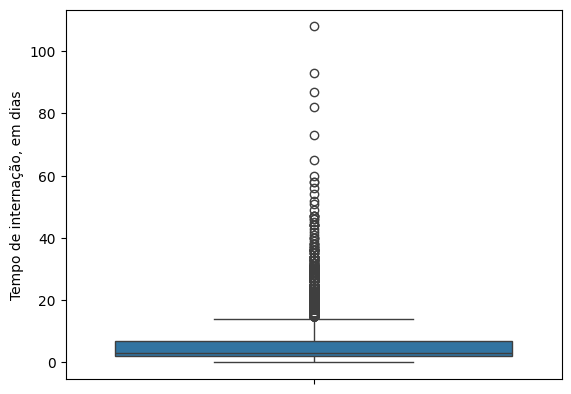

In [283]:
# Visualização gráfica da distribuição dos dados referente ao tempo de internação, em dias

ax2 = sns.boxplot(y='QT_DIARIAS', data=SIH_FINAL)
ax2.set_ylabel('Tempo de internação, em dias')

Pode-se observar que até 75% dos dados se concentram em internações de até 7 dias. Porém, tem-se grande quantidade de valores outliers, sendo que a internação mais longa foi de 108 dias.

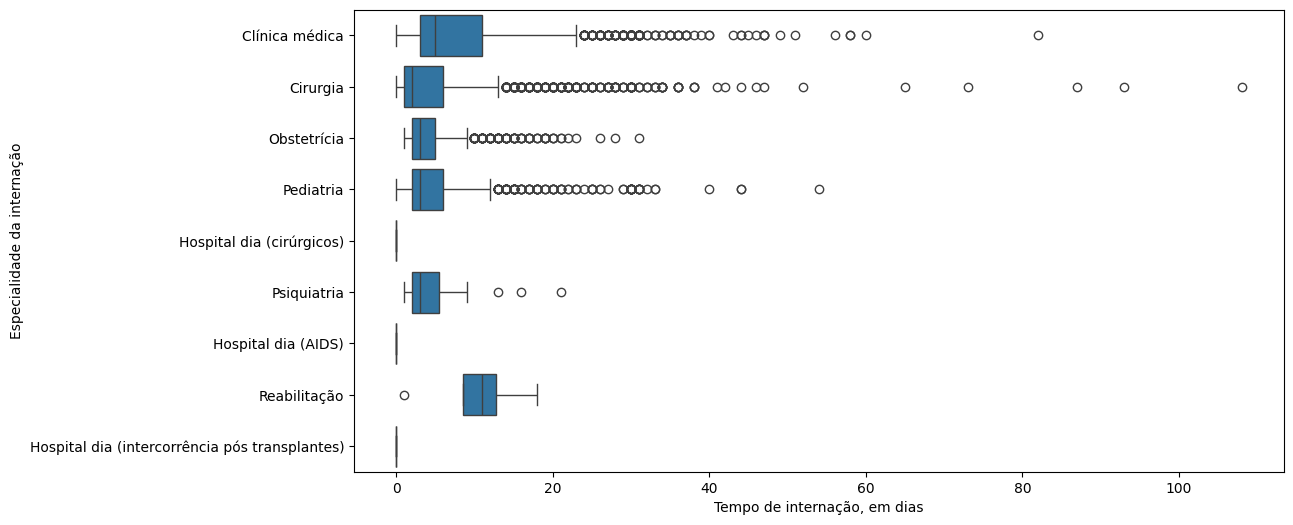

In [284]:
# Visualização gráfica da distribuição do tempo de internação, dependendo da especialidade da internação

plt.figure(figsize=(12, 6))
ax3 = sns.boxplot(x='QT_DIARIAS', y='Valor',
                  data=SIH_concat_espec,
                  #showfliers=False
                  )
ax3.set_xlabel('Tempo de internação, em dias')
ax3.set_ylabel('Especialidade da internação')
plt.xticks(rotation=0)
plt.show()

In [285]:
# Verificar a média do tempo de internação, em dias, dos dados acima

SIH_concat_espec['QT_DIARIAS'].groupby(SIH_concat_espec['Valor']).describe()

,count,mean,std,min,25%,50%,75%,max
Valor,,,,,,,,
Cirurgia,3351.0,5.154282,7.060997,0.0,1.0,2.0,6.00,108.0
Clínica médica,2898.0,8.455487,8.481146,0.0,3.0,5.0,11.00,82.0
Hospital dia (AIDS),38.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
Hospital dia (cirúrgicos),33.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
Hospital dia (intercorrência pós transplantes),4.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
Obstetrícia,1877.0,4.255194,3.122649,1.0,2.0,3.0,5.00,31.0
Pediatria,1660.0,4.882530,5.408346,0.0,2.0,3.0,6.00,54.0
Psiquiatria,32.0,4.750000,4.593122,1.0,2.0,3.0,5.50,21.0
Reabilitação,4.0,10.250000,6.994045,1.0,8.5,11.0,12.75,18.0


Pode-se observar 75% dos dados encontram-se em um tempo de internação abaixo de 13 dias (sendo o maior período deles os de leitos de reabilitação, com 12,75 dias; e o menor sendo os leitos obstétricos, com 5 dias). Porém, temos diversos outliers, e os tempos máximos de internação observados foram de 108 dias nos leitos cirúrgicos, 82 dias nos leitos de clínica médica.

In [286]:
# Verificar a distribuição dos dados referente ao valor total da AIH

SIH_FINAL['VAL_TOT'].describe()

,VAL_TOT
count,9897.000000
mean,1812.588892
std,4578.459249
min,23.450000
25%,469.170000
50%,782.090000
75%,1438.450000
max,129197.240000


Text(0, 0.5, 'Valor total da AIH, em reais')

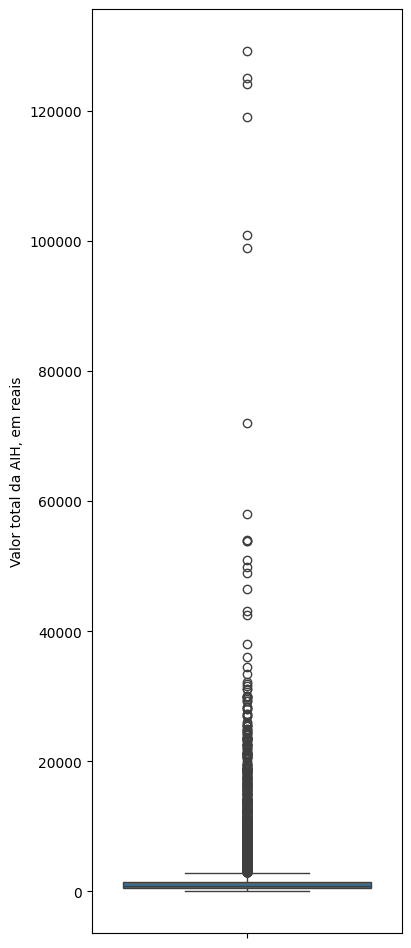

In [287]:
# Visualização gráfica da distribuição dos dados referente ao valor total da AIH

plt.figure(figsize=(4, 12))

ax4 = sns.boxplot(y='VAL_TOT', data=SIH_FINAL)
ax4.set_ylabel('Valor total da AIH, em reais')

Pode-se observar que 75% das internações hospitalares tem custo igual ou menor que R$ 1438,45.

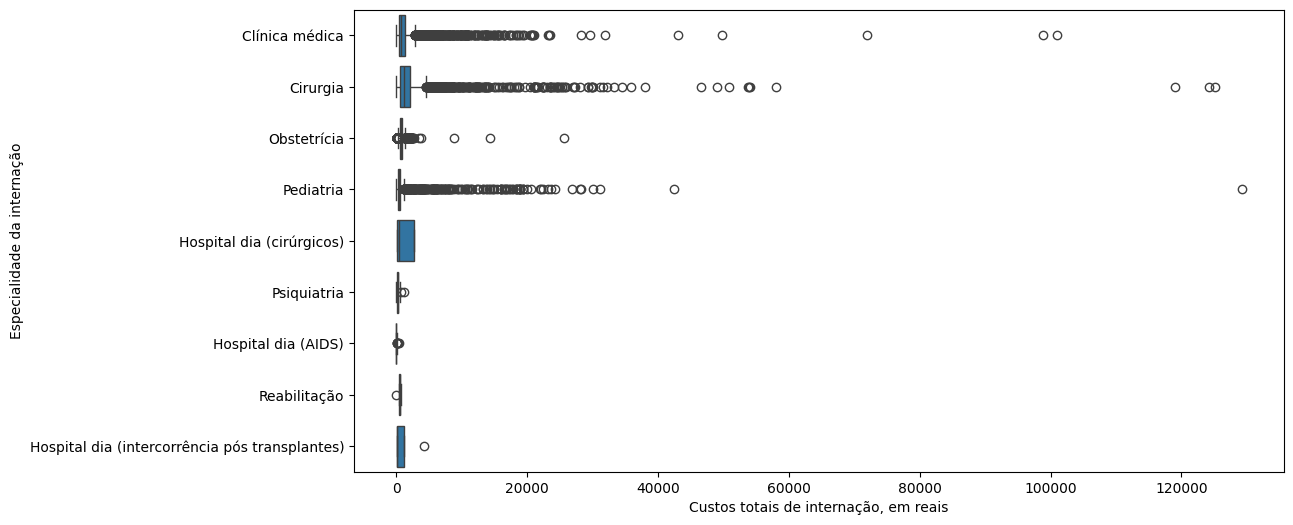

In [288]:
# Visualização gráfica da distribuição dos custos totais de internação, dependendo da especialidade da internação (dados que podem ser visualizados com ou sem os outliers)

plt.figure(figsize=(12, 6))
ax5 = sns.boxplot(x='VAL_TOT', y='Valor',
                  data=SIH_concat_espec,
                  #showfliers=False # Retira os valores outliers
                  )
ax5.set_xlabel('Custos totais de internação, em reais')
ax5.set_ylabel('Especialidade da internação')
plt.xticks(rotation=0)
plt.show()

Da mesma forma que o tempo de internação, em relação aos dados de custos, tem-se grande quantidade de valores outliers. Nesse cenário, temos como ranking de custos de internações os leitos pediátricos, cirúrgicos e de clínica médica.

Porém, ao retiramos os valores outliers, pode-se observar o ranking entre os leitos de hospital-dia (cirúrgicos), cirúrgicos e de clínica médica.

Com isso, podemos inferir que os leitos cirúrgicos e de clínica médica são os que possui maiores gastos.

In [289]:
# Verificar a proporção do motivo de permanência/saída do usuário

SIH_concat_cobranca = pd.merge(SIH_FINAL, conv_cobranca, on='COBRANCA')

SIH_concat_cobranca['Valor'].value_counts(normalize=True)*100

,proportion
Valor,
Alta melhorado,59.048196
Alta da mãe/puérpera e do recém-nascido,15.661312
Transferência para outro estabelecimento,6.304941
Óbito com DO fornecida pelo médico assistente,5.173285
Encerramento administrativo,2.616955
Alta com previsão de retorno p/acomp do paciente,2.101647
Alta por evasão,1.646964
Alta curado,1.475195
Permanência por intercorrência,1.364050


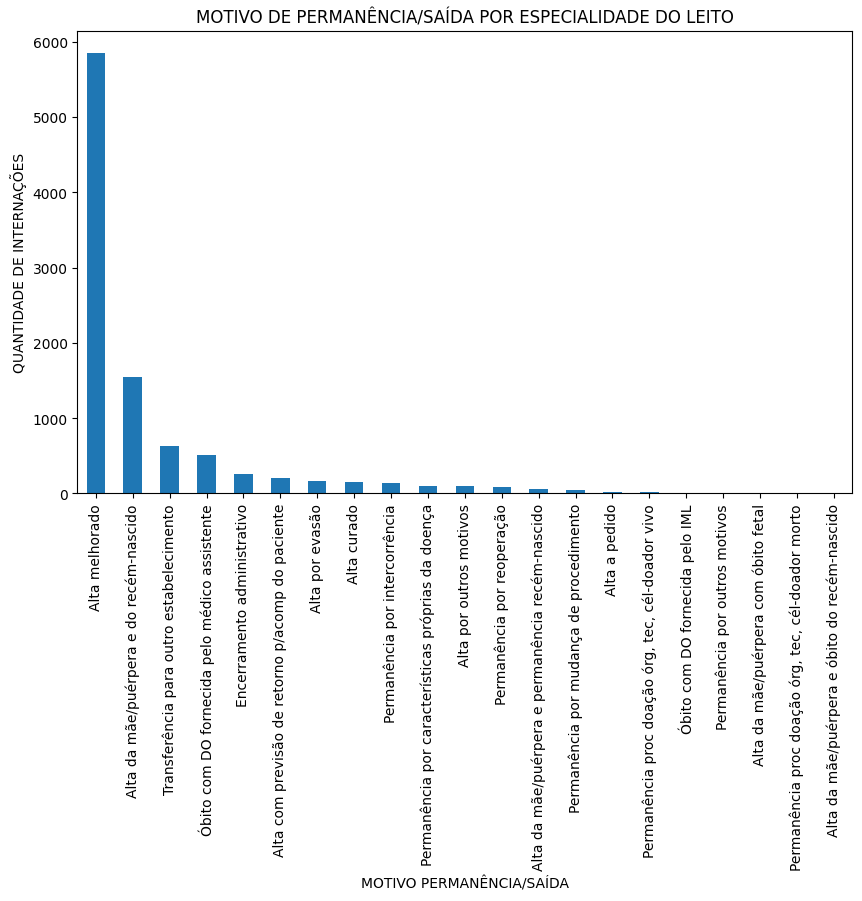

In [290]:
# Visualizar graficamente a contagem do motivo de permanência/saída do usuário

# Calcular os valores de contagem
value_counts = SIH_concat_cobranca['Valor'].value_counts()

# Calcular o total de elementos para calcular a porcentagem
total = value_counts.sum()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
ax6 = value_counts.plot(kind='bar')

# Adicionar título e rótulos aos eixos
plt.title('MOTIVO DE PERMANÊNCIA/SAÍDA POR ESPECIALIDADE DO LEITO')
plt.xlabel('MOTIVO PERMANÊNCIA/SAÍDA')
plt.ylabel('QUANTIDADE DE INTERNAÇÕES')

# Alterar o ângulo dos rótulos do eixo X
plt.xticks(rotation=90)

plt.show()

Observa-se que 59,05% das internações possui como desfecho a alta melhorado, seguido de 15,66% de alta da mãe/puérpera e do recém-nascido.

In [291]:
# Verificar se há correlação entre o custo da internação com tempo de internação

SIH_FINAL['VAL_TOT'].corr(SIH_FINAL['QT_DIARIAS'])

0.07323664917332165

Observa-se que não há correlação forte entre o custo e o tempo de internação.

In [299]:
# Verificar a proporção de diagnóstico principal da internação

# Contar as ocorrências de cada diagnóstico e calcular a porcentagem
resultado = SIH_FINAL['DIAG_PRINC'].value_counts(normalize=True) * 100

# Organizar em ordem decrescente
resultado_ordenado = resultado.sort_values(ascending=False)

# Exibir o resultado
print(resultado_ordenado)

DIAG_PRINC
O800    9.043144
J189    3.142366
O820    2.717995
J159    2.546226
I509    1.768213
          ...   
C835    0.010104
Z523    0.010104
D593    0.010104
P619    0.010104
C419    0.010104
Name: proportion, Length: 1329, dtype: float64


Observa-se que o principal diagnóstico principal de internação é CID O800, referente ao parto espontâneo cefálico.

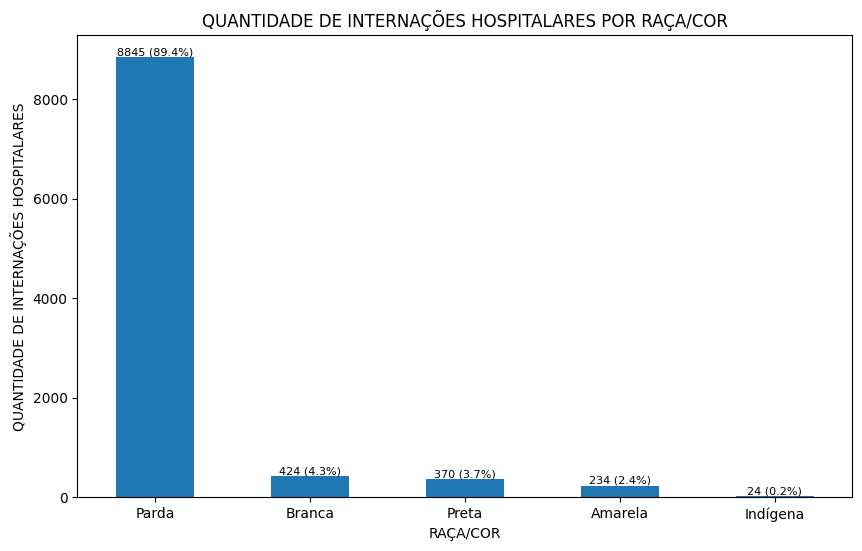

In [301]:
# Ver a contagem e proporção de internações hospitalares por raça/cor

# Concatenar os códigos da especialidade de internação com os nomes dados pela planilha de Convenções SIH
SIH_concat_raca_cor = pd.merge(SIH_FINAL, conv_raca_cor, on='RACA_COR')

# Calcular os valores de contagem
value_counts = SIH_concat_raca_cor['Valor'].value_counts()

# Calcular o total de elementos para calcular a porcentagem
total = value_counts.sum()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
ax7 = value_counts.plot(kind='bar')

# Adicionar os valores e as porcentagens nas barras
for i, v in enumerate(value_counts):
    percentage = (v / total) * 100
    ax7.text(i, v + 0.1, f'{v} ({percentage:.1f}%)', ha='center', va='bottom', fontsize=8)

# Adicionar título e rótulos aos eixos
plt.title('QUANTIDADE DE INTERNAÇÕES HOSPITALARES POR RAÇA/COR')
plt.xlabel('RAÇA/COR')
plt.ylabel('QUANTIDADE DE INTERNAÇÕES HOSPITALARES')

# Alterar o ângulo dos rótulos do eixo X
plt.xticks(rotation=0)

plt.show()

Observa-se que a maior proporção de usuários atendidos é da cor parda.

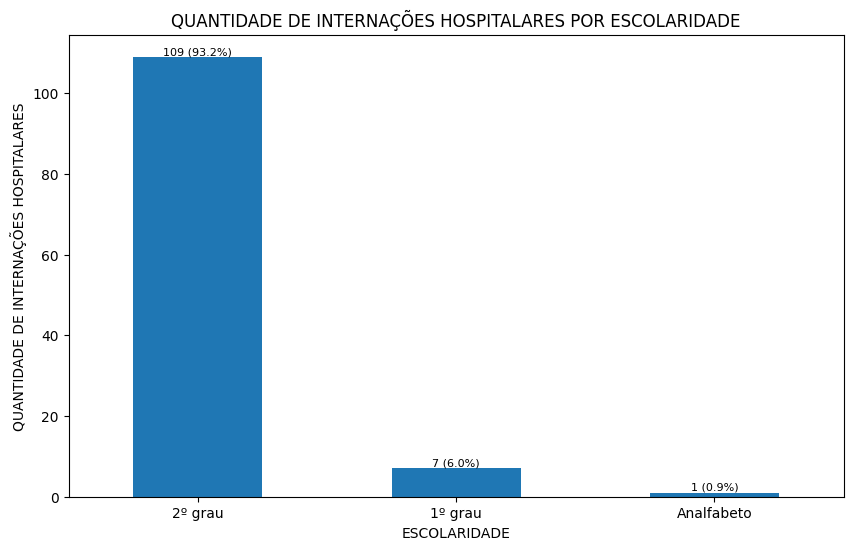

In [303]:
# Ver a contagem e proporção de internações hospitalares por escolaridade

# Concatenar os códigos da especialidade de internação com o nome das especialidades dadas pela planilha de Convenções SIH
SIH_concat_instru = pd.merge(SIH_FINAL, conv_instrucao, on='INSTRU')

# Calcular os valores de contagem
value_counts = SIH_concat_instru['Valor'].value_counts()

# Calcular o total de elementos para calcular a porcentagem
total = value_counts.sum()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
ax8 = value_counts.plot(kind='bar')

# Adicionar os valores e as porcentagens nas barras
for i, v in enumerate(value_counts):
    percentage = (v / total) * 100
    ax8.text(i, v + 0.1, f'{v} ({percentage:.1f}%)', ha='center', va='bottom', fontsize=8)

# Adicionar título e rótulos aos eixos
plt.title('QUANTIDADE DE INTERNAÇÕES HOSPITALARES POR ESCOLARIDADE')
plt.xlabel('ESCOLARIDADE')
plt.ylabel('QUANTIDADE DE INTERNAÇÕES HOSPITALARES')

# Alterar o ângulo dos rótulos do eixo X
plt.xticks(rotation=0)

plt.show()

Observa-se que a maioria dos usuários atendidos possui até 0 2º grau de escolaridade.